In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np

In [3]:
#ทำนายการติดโรคมะเร้็งชนิดหนึ่ง 
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv')
df = df.set_index('hn')
df.head()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
#Check number of data
df.shape

(1723, 23)

In [5]:
#Check any missing data in each column
df.isnull().sum(axis=0)

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
appearance    101
stage          24
pchemo          1
Wardsize      145
finalhisto     10
nodeyiel       12
RHlvsi        366
depth         489
size          114
utmet          98
vgmargin       96
vgmet          97
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

In [6]:
#ดูเลข 21 28
df.isnull().sum(axis=0)/1723 *100

age            0.000000
parity         0.000000
hiv            0.232153
menopaus       0.058038
disease        0.000000
surgery        0.000000
conization     0.290192
OPDsize        0.986651
appearance     5.861869
stage          1.392919
pchemo         0.058038
Wardsize       8.415554
finalhisto     0.580383
nodeyiel       0.696460
RHlvsi        21.242020
depth         28.380731
size           6.616367
utmet          5.687754
vgmargin       5.571677
vgmet          5.629716
pelvicme       0.058038
pmmet          5.455601
adnmet         0.406268
dtype: float64

In [7]:
df.isnull() #งี้ก็ได้ เราจะทำนาย pmnet

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2633481,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2634477,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2633633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2630496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3167041,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2623351,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False


In [8]:
#Delete column with missing data
#Size OPDsize มันเหมือนกัน
df_clean_column = df.drop(['size','appearance','Wardsize','RHlvsi','depth','nodeyiel','vgmargin','pelvicme','adnmet'],axis = 1)
df_clean_column.isnull().sum(axis=0)

age            0
parity         0
hiv            4
menopaus       1
disease        0
surgery        0
conization     5
OPDsize       17
stage         24
pchemo         1
finalhisto    10
utmet         98
vgmet         97
pmmet         94
dtype: int64

In [9]:
#Delete row with at least 1 missing data
df_clean = df_clean_column.dropna(axis = 0)

In [10]:
df_clean

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,stage,pchemo,finalhisto,utmet,vgmet,pmmet
hn,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,5.0,0.0,3.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,5.0,0.0,1.0,0.0,0.0,0.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,4.0,0.0,3.0,0.0,0.0,0.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [11]:
#Total Clean Data
df_clean.shape

(1571, 14)

In [12]:
#Check number of sample in pelvicme class
pel_class = np.unique(df_clean['pmmet'])
pel_class

array([0., 1.])

In [13]:
pel_value = [sum(df_clean['pmmet']==pel_class[0]),
             sum(df_clean['pmmet']==pel_class[1])]
pel_value

[1291, 280]

In [14]:
#Separate pelviceme dataset into data (X) and label (y)
# y คือตัวแปรตาม 
y = df_clean['pmmet'].values #คำตอบที่เราจะสอนโมเดล
X = df_clean.drop(['pmmet'],axis = 1).values #คอลัมที่เหลือดรอปทิ้ง

In [15]:
X.shape

(1571, 13)

In [16]:
#Separate Data into Train & Test (Note: Imbalance Dataset) แบ่งข้อมูลออกเป็น2กลุ่ม จารย์ใช้สูตร80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
#Data normalization to range of (0 to 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) #scaler = MinMaxScaler() งี้ก็ได้
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [18]:
np.min(X_train_norm, axis=0) #ดูทุกคอลัม ค่าที่ต่ำที่สุดของทุกคอลัมคือ 0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
np.max(X_train_norm, axis=0) #ค่าที่สูงที่สุดของทุกคอลัมคือ 0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Logistic Regression**

In [20]:
#10-Folds Cross Validation Training Accuracy with Tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'C': [1, 2, 4, 8, 16]} #กำหนดค่าที่อยากจูน
#LogisticRegression(random_state=0, solver='liblinear' เขียนให้ไม่งง
#best_model = GridSearchCV (model,params, cv=10)
#best_model.clf.fit(X_train_norm, y_train) 
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10)
#ไล่จูนพารามิตเตอร์นี้ทั้งหมด หา traning aqulercy
clf.fit(X_train_norm, y_train) 
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 1}
10CV accuracy : 81.37079365079366


In [21]:
#Test Accuracy
#y_predict = clf.predict(X_test_norm)
#100* sum(y_test == y_predict) / len(y_test)
#ข้างบน traning 81 อันนี้ testing 87 ห่างกันไม่เยอะ/ห่างกันเกิน10 ถือว่าโอเค
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm) # xtestคือข้อมูลชุดทดสอบ เก็บผลทำนายไว้ที่y
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 87.61904761904762


In [22]:
y_predict = clf.predict(X_test_norm)

In [23]:
100* sum(y_test == y_predict) / len(y_test)

87.61904761904762

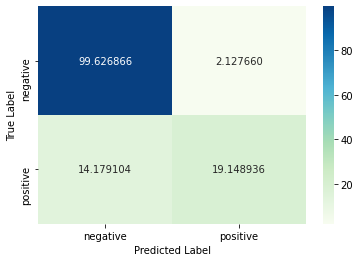

In [24]:
#พล็อต
from sklearn.metrics import confusion_matrix #ให้คำตอบว่าทาย classไหนแม่น ไม่แม่น ทายคลาสนี้ผิดไปกี่%
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [25]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.88      1.00      0.93       268
    positive       0.90      0.19      0.32        47

    accuracy                           0.88       315
   macro avg       0.89      0.59      0.62       315
weighted avg       0.88      0.88      0.84       315



**Support Vector Machine**

In [ ]:
#10-Folds Cross Validation Training Accuracy
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C' : [1,2,4,8,16,32], # High C = Overfitting
    'gamma' : [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32] # High gamma = Overfitting
}
clf = GridSearchCV(SVC(),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print(classification_report(y_test, y_predict, target_names=target_names))

**Random Forest**

In [ ]:
#10-Folds Cross Validation Training Accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [10,50,100,200,500],
    'min_samples_leaf' : [1,2,4,8,16,32],
    'max_features' : ['sqrt',0.5,0.8],
    'criterion' : ['gini','entropy']
}
clf = GridSearchCV(RandomForestClassifier(random_state=0),params, cv = 10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print(classification_report(y_test, y_predict, target_names=target_names))

**XGBoost**

In [ ]:
#10-Folds Cross Validation Training Accuracy
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [10,50,100,200],
    'max_depth' : [2, 4, 8],
    'learning_rate' : [0.001, 0.01, 0.1],
    'subsample' : [0.5,0.8, 1],
    'colsample_bytree' : [0.5, 0.8, 1]    
}
clf = GridSearchCV(xgb.XGBClassifier(random_state=0, objective='binary:logistic',n_jobs=-1),params, cv = 10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print(classification_report(y_test, y_predict, target_names=target_names))

In [ ]:
#test
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C' : [0.5,1,2,4,8], # High C = Overfitting
    'gamma' : [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32] # High gamma = Overfitting
}
clf = GridSearchCV(SVC(),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)*100

# **Homework**

In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
params = {'loss' : ['hinge','log','modified_huber','squared_hinge','perceptron'],
          'penalty' : ['l2', 'l1', 'none', 'elasticnet'],
          'alpha' : [0.0001,0.001,0.01,0.1],
          'l1_ratio' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
clf = GridSearchCV(SGDClassifier(),params, cv=10)
clf.fit(X_train_norm, y_train) 
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_mo

Best params : {'alpha': 0.01, 'l1_ratio': 0.5, 'loss': 'modified_huber', 'penalty': 'none'}
10CV accuracy : 81.92761904761905


In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)*100

86.66666666666667

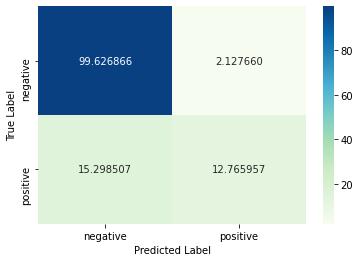

In [31]:
from sklearn.metrics import confusion_matrix #ให้คำตอบว่าทาย classไหนแม่น ไม่แม่น ทายคลาสนี้ผิดไปกี่%
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [32]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.87      1.00      0.93       268
    positive       0.86      0.13      0.22        47

    accuracy                           0.87       315
   macro avg       0.86      0.56      0.57       315
weighted avg       0.87      0.87      0.82       315

